# Matplotlib

In [1]:
from matplotlib import pyplot as plt

In [2]:
x = [10, 20, 30, 40]
y = [0, 15, 10, 25]

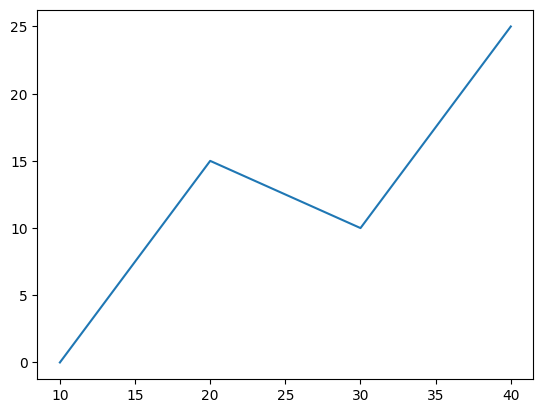

In [3]:
plt.plot(x, y);

# Seaborn

\#1. Seaborn updates `matplotlib`'s rc parameters to improve aesthetics

In [5]:
import seaborn as sns

In [8]:
sns.set() # 設定seaborn

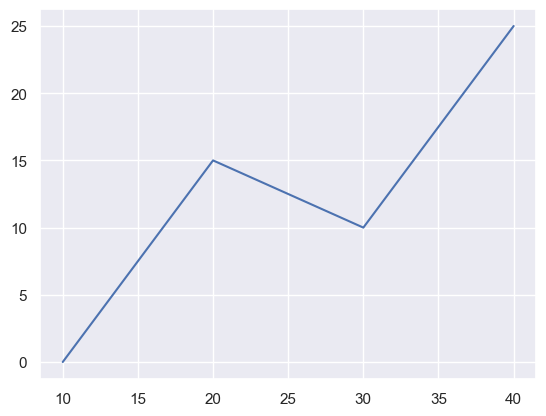

In [7]:
plt.plot(x, y);

In [ ]:
sns.set_style("white") # 把格子拿掉

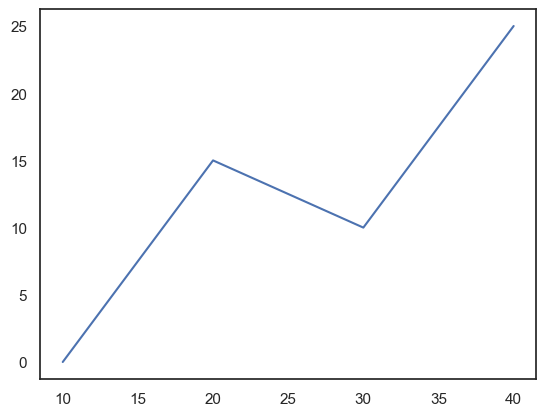

In [10]:
plt.plot(x, y);

#### Versions

In [9]:
import matplotlib
matplotlib.__version__

'3.6.1'

In [10]:
sns.__version__

'0.12.0'

## Seaborn with `pandas`

\#2. Let Seaborn group, aggregate, and plot your `pandas` dataframes

In [ ]:
cars = sns.load_dataset('mpg') # load_dataset

In [12]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [13]:
type(cars)

pandas.core.frame.DataFrame

In [14]:
cars.dropna(inplace=True)

cars.shape

(392, 9)

In [15]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


| 英文欄位名稱        | 中文欄位名稱    | 說明                                       |
|--------------------|--------------|------------------------------------------|
| mpg               | 每加侖英里數  | 每加侖汽油能行駛的英里數，衡量燃油效率的指標        |
| cylinders         | 汽缸數        | 引擎的汽缸數量，通常與引擎大小和動力有關          |
| displacement      | 排量          | 引擎排量（立方英吋），通常代表引擎的大小          |
| horsepower        | 馬力          | 引擎的動力輸出，馬力數越高通常代表加速性越好       |
| weight            | 車重          | 車輛的重量（磅），影響燃油效率與性能            |
| acceleration      | 加速度        | 從靜止加速到某一速度的能力（時間，秒）            |
| model_year        | 車型年份      | 車型的生產年份                            |
| origin            | 出產地區      | 車輛的原產地（例如：美國、歐洲、日本等）         |
| name              | 車名          | 車輛的名稱，包括品牌與型號                   |


In [16]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


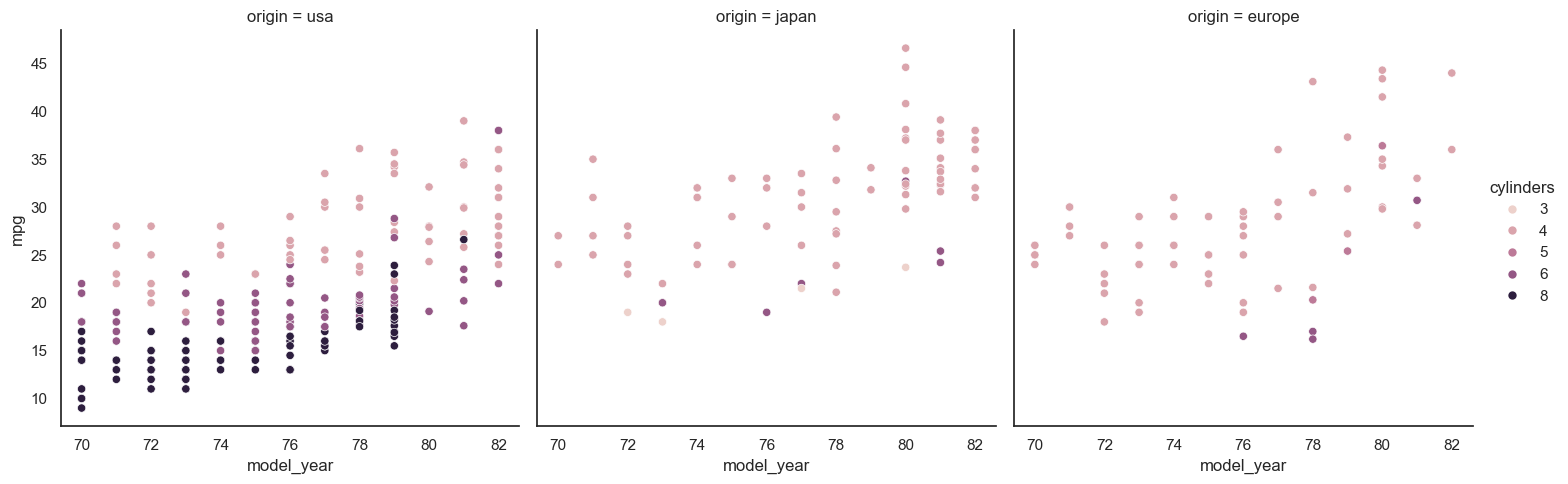

In [ ]:
sns.relplot(data=cars, x='model_year', y='mpg', col='origin', hue='cylinders'); 
# hue:用這欄(cylinders)當圖例; col:用這個(origin)欄位分別作圖

## More Examples

\#3. Seaborn allows for additional plot types and easy plotting functionality

<Axes: xlabel='waiting', ylabel='duration'>

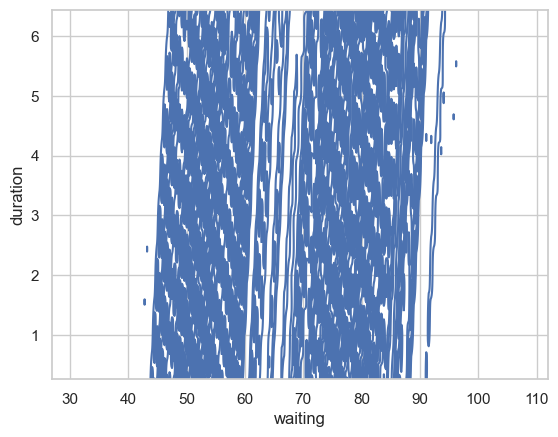

In [ ]:
# 官網數據也跑圖 代表是vscode的問題 不支援這種圖種 放棄畫這種的圖吧！！
geyser = sns.load_dataset("geyser")
sns.kdeplot(data=geyser, x="waiting", y="duration")

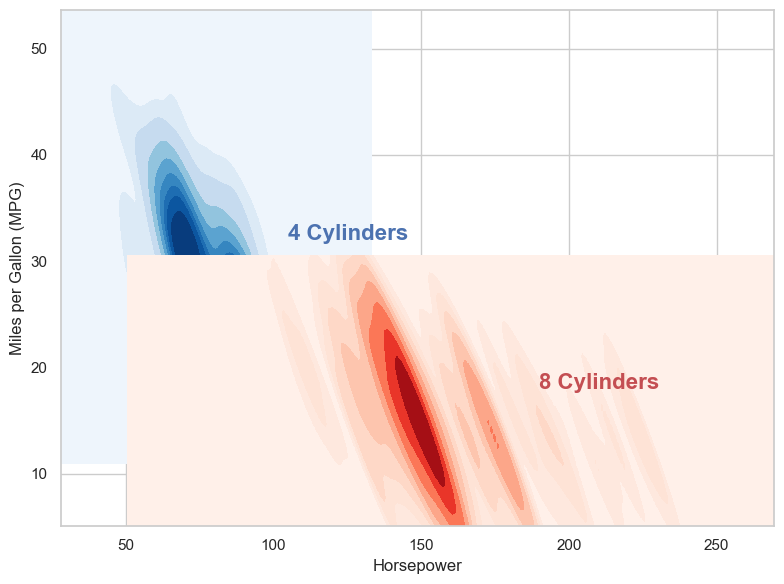

In [20]:
sns.set_style('whitegrid')

cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(x = cyl_4.horsepower, y = cyl_4.mpg,
            cmap="Blues", fill=True, thresh=False)
sns.kdeplot(x = cyl_8.horsepower, y = cyl_8.mpg,
            cmap="Reds", fill=True, thresh=False)

plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')

plt.annotate("4 Cylinders", (105, 32), color='b', fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color='r', fontsize=16, fontweight='bold')
plt.tight_layout()

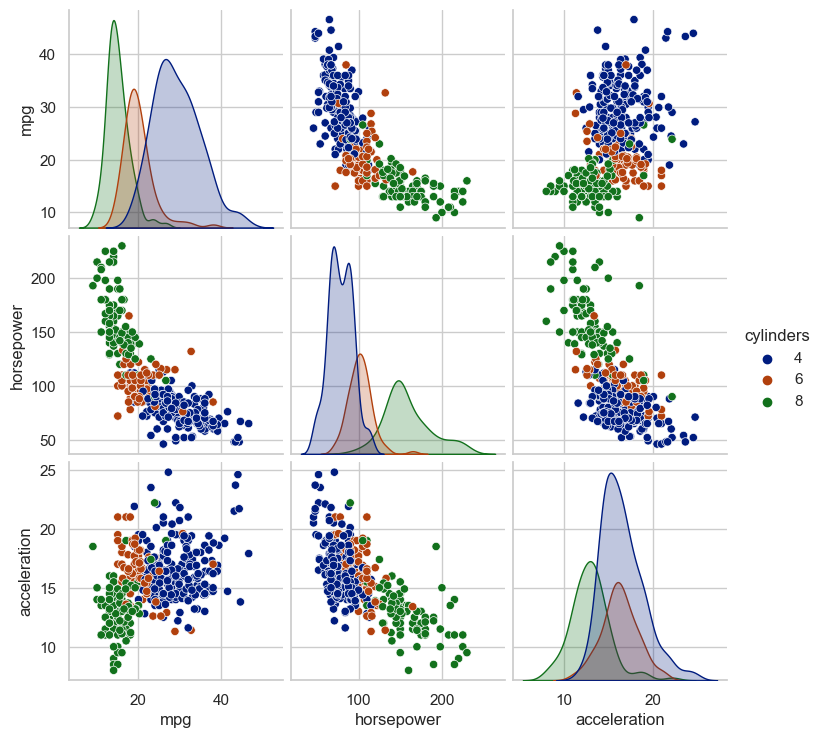

In [ ]:
#散點圖
sns.pairplot(cars[cars.cylinders.isin([4,6,8])], 
             hue='cylinders', 
             vars=['mpg', 'horsepower', 'acceleration'],  # 3個變數交叉比對
             palette='dark'
            );

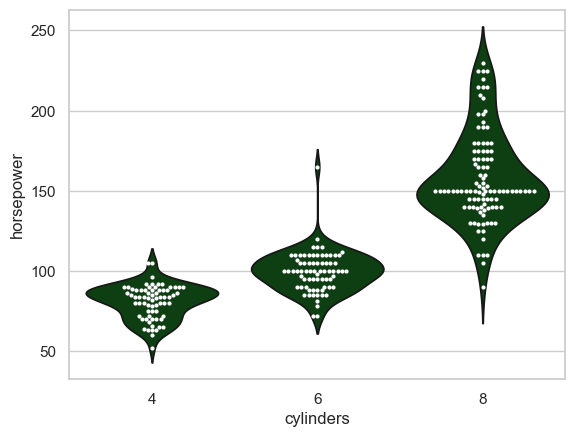

In [ ]:
usa = cars[cars.origin == 'usa']

sns.violinplot(x=usa.cylinders, y=usa.horsepower,
               density_norm='width', inner=None, color='xkcd:forest green'
              )
sns.swarmplot(x=usa.cylinders, y=usa.horsepower,
              color='white', size=3
             ); # 加上數據點

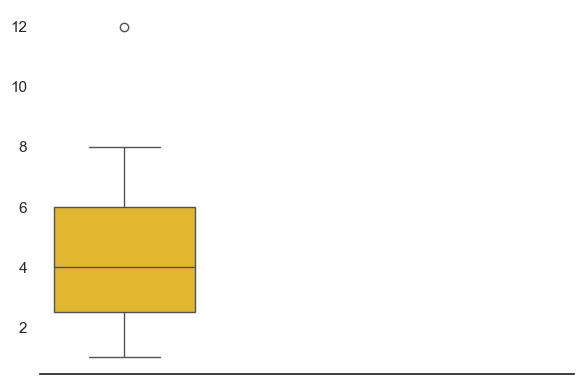

In [26]:
sns.set_style('white')
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]

plt.figure(figsize=(6,4))
sns.boxplot(pts, color='xkcd:golden yellow', width=5)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();

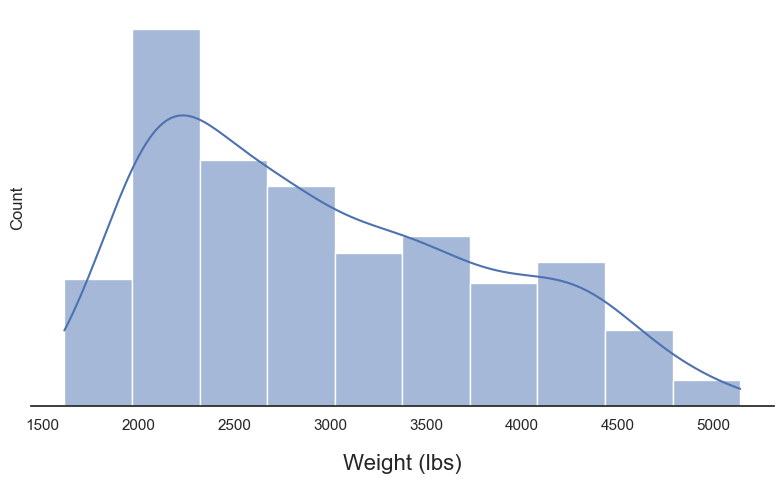

In [ ]:
plt.figure(figsize=(8,5))
# sns.histplot(cars.weight, 
#              bins=20,
#              kde_kws={"lw": 8, 'color':'xkcd:bluish green'},
#             #  hist_kws={'alpha': 0.3, 'color':'gray'}
#             ) 舊版，已不支援

sns.histplot(data=cars, x="weight", kde=True)

sns.despine(left=True)
plt.xlabel('Weight (lbs)', fontsize=16, labelpad=15)
plt.yticks([])
plt.tight_layout();

C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\xdxd2\AppData\Local\Temp\ipykernel_26956\367797590.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['USA', 'Japan', 'Europe'])
C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 800x600 with 0 Axes>

C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


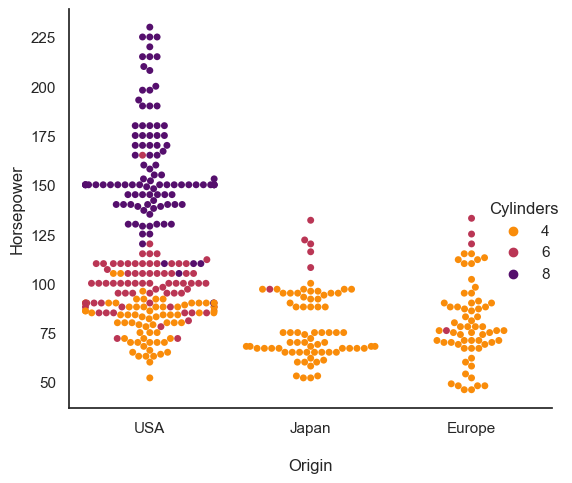

In [ ]:
plt.figure(figsize=(8,6))
g = sns.catplot(x='origin', y='horsepower', hue='cylinders', 
                kind='swarm', #改圖種 預設散點圖 
                palette=sns.color_palette('inferno_r', 3,),
                data=cars[cars.cylinders.isin([4, 6, 8])]
               )

plt.xlabel('\nOrigin')
plt.ylabel('Horsepower')
plt.gca().set_xticklabels(['USA', 'Japan', 'Europe'])
g._legend.set_title('Cylinders')
plt.tight_layout();